In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
def plot_metric(folder_name, reference_line = None):
    raw_boundaries = pd.read_csv(folder_name + 'raw-boundaries.csv')
    raw_LSD = pd.read_csv(folder_name + 'raw-lsds.csv')
    LSDgt_boundaries = pd.read_csv(folder_name + 'lsds_gt-boundaries.csv')
    LSDpred_boundaries = pd.read_csv(folder_name + 'lsds_pred-boundaries.csv')
    raw_boundariesLSD = pd.read_csv(folder_name + 'raw-boundaries_lsds.csv')
    rawLSDgt_boundaries = pd.read_csv(folder_name + 'raw_lsds_gt-boundaries.csv')
    rawLSDpred_boundaries = pd.read_csv(folder_name + 'raw_lsds_pred-boundaries.csv')

    loss_boundary_max = max(raw_boundaries['0'].max(), raw_boundariesLSD['1'].max(), LSDgt_boundaries['0'].max(), rawLSDgt_boundaries['0'].max(), LSDpred_boundaries['0'].max(), rawLSDpred_boundaries['0'].max())
    loss_lsd_max = max(raw_LSD['0'].max(), raw_boundariesLSD['2'].max())

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    axs[0].plot(raw_boundaries['step'], raw_boundaries['0'], color='#ffe680', label='baseline')
    axs[0].plot(raw_boundariesLSD['step'], raw_boundariesLSD['1'], color='#97cdde', label='MTLSD')
    axs[0].plot(LSDgt_boundaries['step'], LSDgt_boundaries['0'], color='#feaaff', linestyle='dotted', label='ACLSD_2 (from LSD gt)')
    axs[0].plot(rawLSDgt_boundaries['step'], rawLSDgt_boundaries['0'], color='#aa87de', linestyle='dotted', label='ACRLSD_2 (from LSD gt)')
    axs[0].plot(LSDpred_boundaries['step'], LSDpred_boundaries['0'], color='#feaaff', label='ACLSD_2 (from LSD pred)')
    axs[0].plot(rawLSDpred_boundaries['step'], rawLSDpred_boundaries['0'], color='#aa87de', label='ACRLSD_2 (from LSD pred)')
    axs[0].set_title('loss on boundary prediction')
    axs[0].set_xlabel('step')
    axs[0].set_ylabel('average loss on validation')
    axs[0].set_ylim([0, loss_boundary_max])
    axs[0].legend(loc='upper right')

    axs[1].plot(raw_LSD['step'], raw_LSD['0'], color='#5fd35f', label='ACLSD_1')
    axs[1].plot(raw_boundariesLSD['step'], raw_boundariesLSD['2'], color='#97cdde', label='MTLSD')
    axs[1].set_title('loss on LSDs prediction')
    axs[1].set_xlabel('step')
    axs[1].set_ylabel('average loss on validation')
    axs[1].set_ylim([0, loss_lsd_max])
    axs[1].legend(loc='upper right')

    plt.savefig(folder_name + 'plot-recap.png')
    plt.show()
    plt.close()

    # loss on boundary prediction
    plot_name = folder_name + 'plot-loss_boundary'
    if reference_line is not None:
        plot_name += '_ref' + str(reference_line)
    plot_name += '.png'

    plt.figure(figsize=(10, 6))

    plt.plot(raw_boundaries['step'], raw_boundaries['0'], color='#ffe680', label='baseline')
    plt.plot(raw_boundariesLSD['step'], raw_boundariesLSD['1'], color='#97cdde', label='MTLSD')
    plt.plot(LSDgt_boundaries['step'], LSDgt_boundaries['0'], color='#feaaff', linestyle='dotted', label='ACLSD_2 (from LSD gt)')
    plt.plot(rawLSDgt_boundaries['step'], rawLSDgt_boundaries['0'], color='#aa87de', linestyle='dotted', label='ACRLSD_2 (from LSD gt)')
    plt.plot(LSDpred_boundaries['step'], LSDpred_boundaries['0'], color='#feaaff', label='ACLSD_2 (from LSD pred)')
    plt.plot(rawLSDpred_boundaries['step'], rawLSDpred_boundaries['0'], color='#aa87de', label='ACRLSD_2 (from LSD pred)')
    if reference_line is not None:
        plt.hlines(reference_line, xmin=0, xmax=max(raw_LSD['step']), color='red', linestyle='dashed')
    plt.title('loss on boundary prediction')
    plt.xlabel('step')
    plt.ylabel('average loss on validation')
    plt.ylim([0, loss_boundary_max])
    plt.legend(loc='upper right')

    plt.savefig(plot_name)
    plt.show()
    plt.close()

    # loss on LSDs prediction
    plot_name = folder_name + 'plot-loss_lsd'
    if reference_line is not None:
        plot_name += '_ref' + str(reference_line)
    plot_name += '.png'
    plt.figure(figsize=(10, 6))

    plt.plot(raw_LSD['step'], raw_LSD['0'], color='#5fd35f', label='ACLSD_1')
    plt.plot(raw_boundariesLSD['step'], raw_boundariesLSD['2'], color='#97cdde', label='MTLSD')
    if reference_line is not None:
        plt.hlines(reference_line, xmin=0, xmax=max(raw_LSD['step']), color='red', linestyle='dashed')
    plt.title('loss on LSDs prediction')
    plt.xlabel('step')
    plt.ylabel('average loss on validation')
    plt.ylim([0, loss_lsd_max])
    plt.legend(loc='upper right')

    plt.savefig(plot_name)
    plt.show()
    plt.close()
    
    return 0

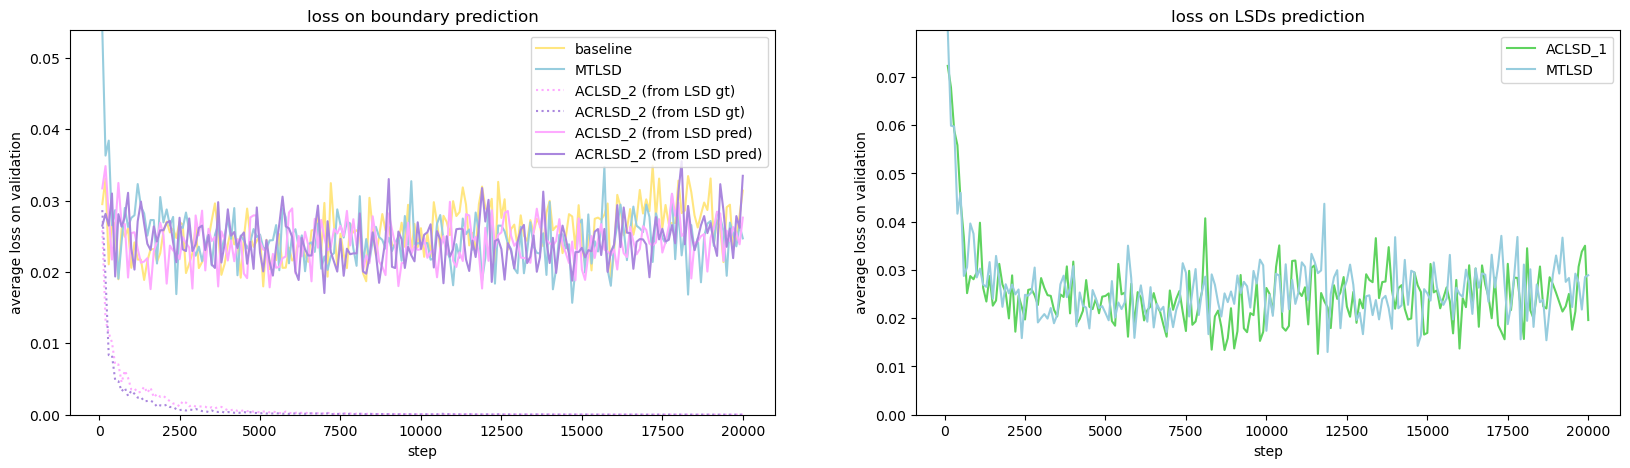

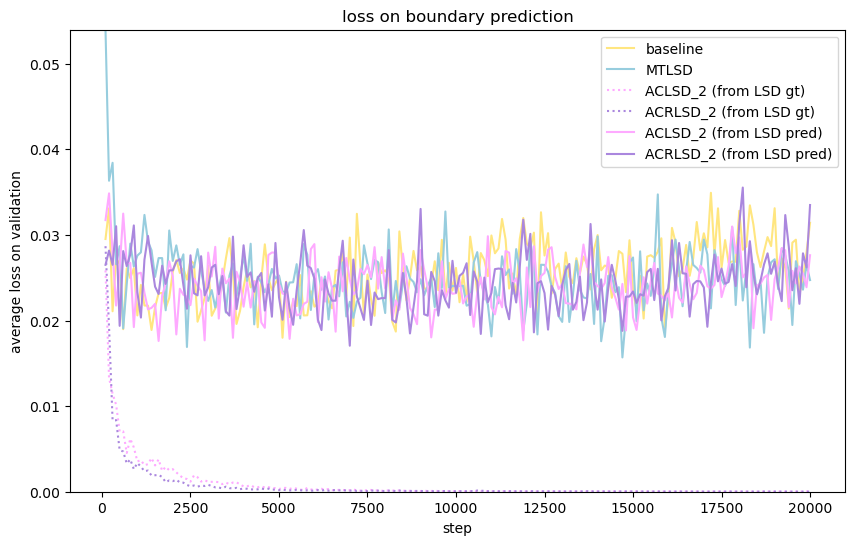

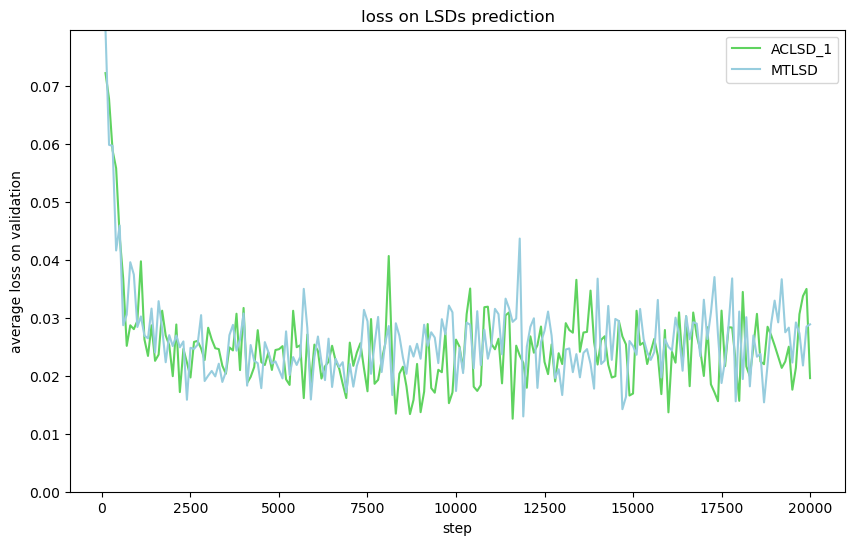

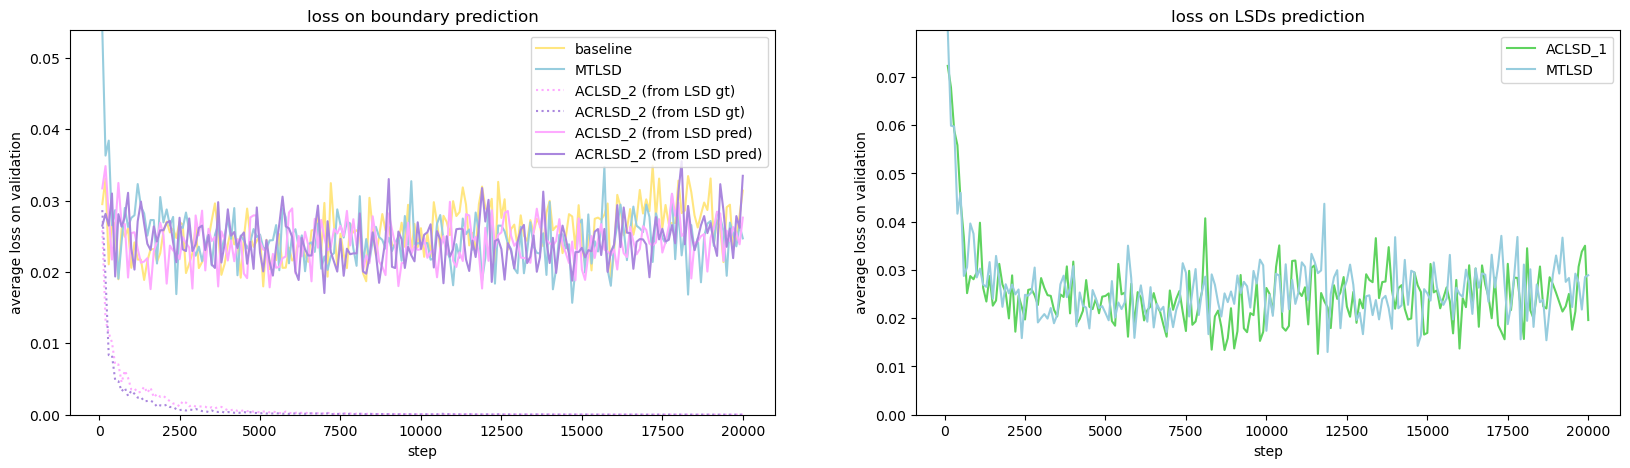

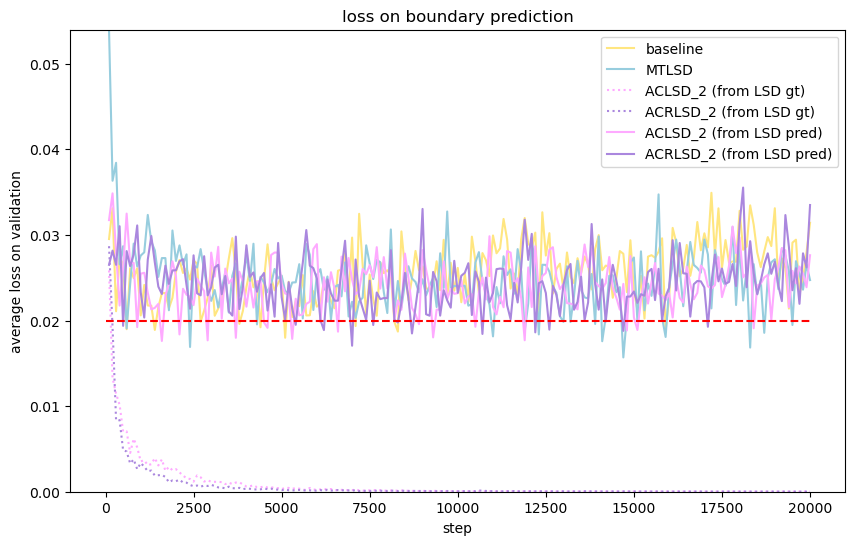

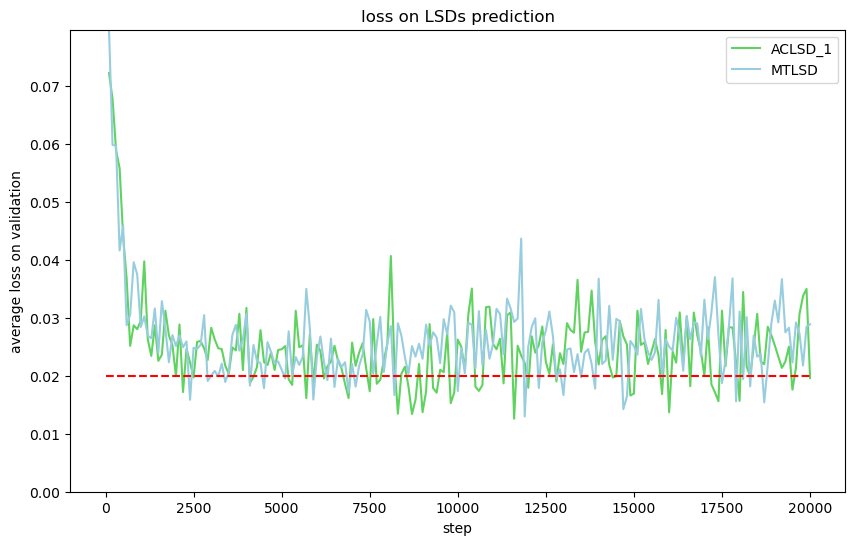

0

In [12]:
folder_name = '/home/enrico.negri/github/lsd_testing/output_20000_14_256_s5/'
plot_metric(folder_name)
plot_metric(folder_name, reference_line=0.02)

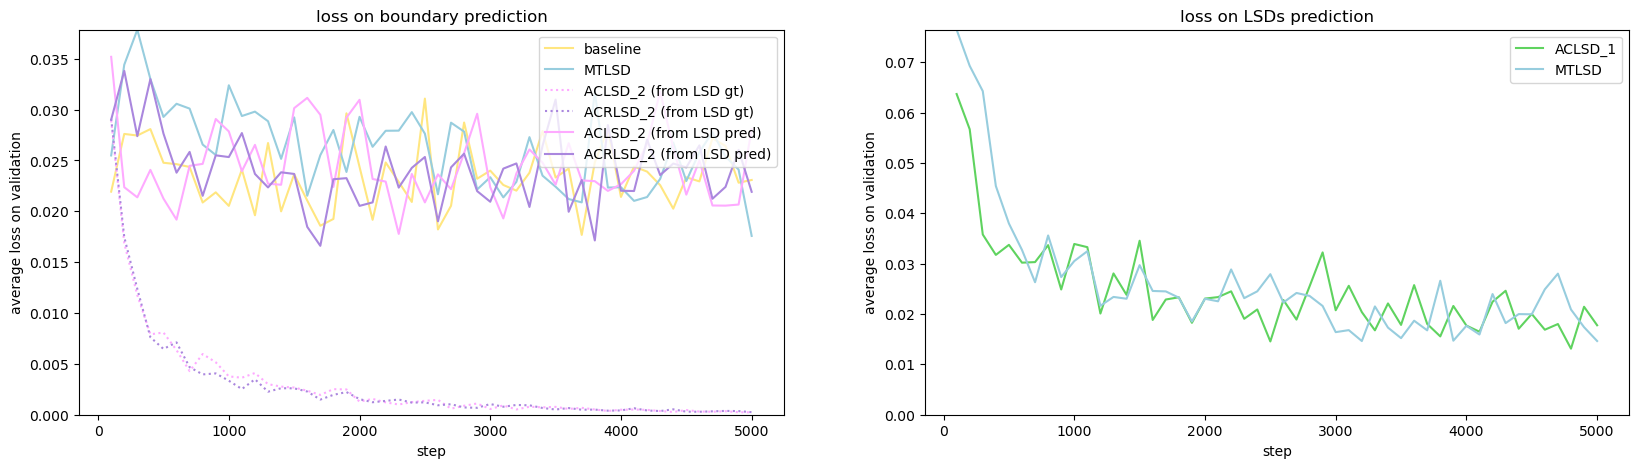

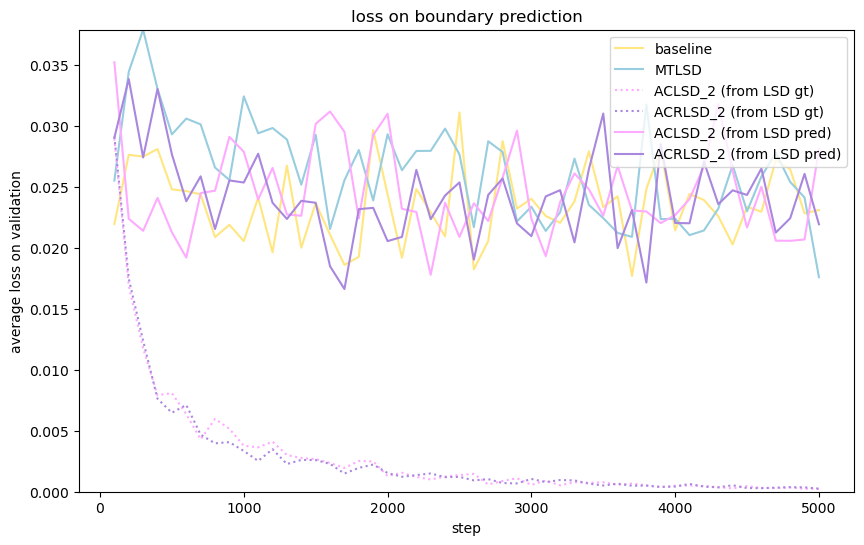

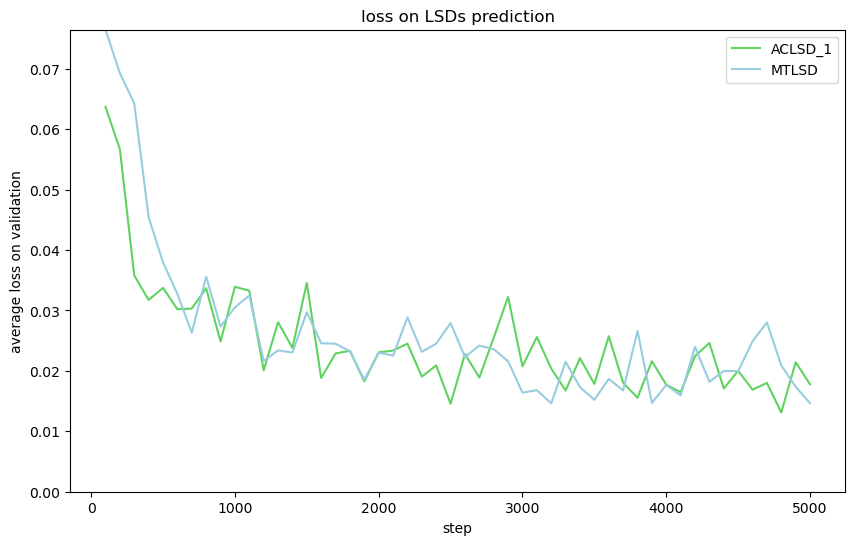

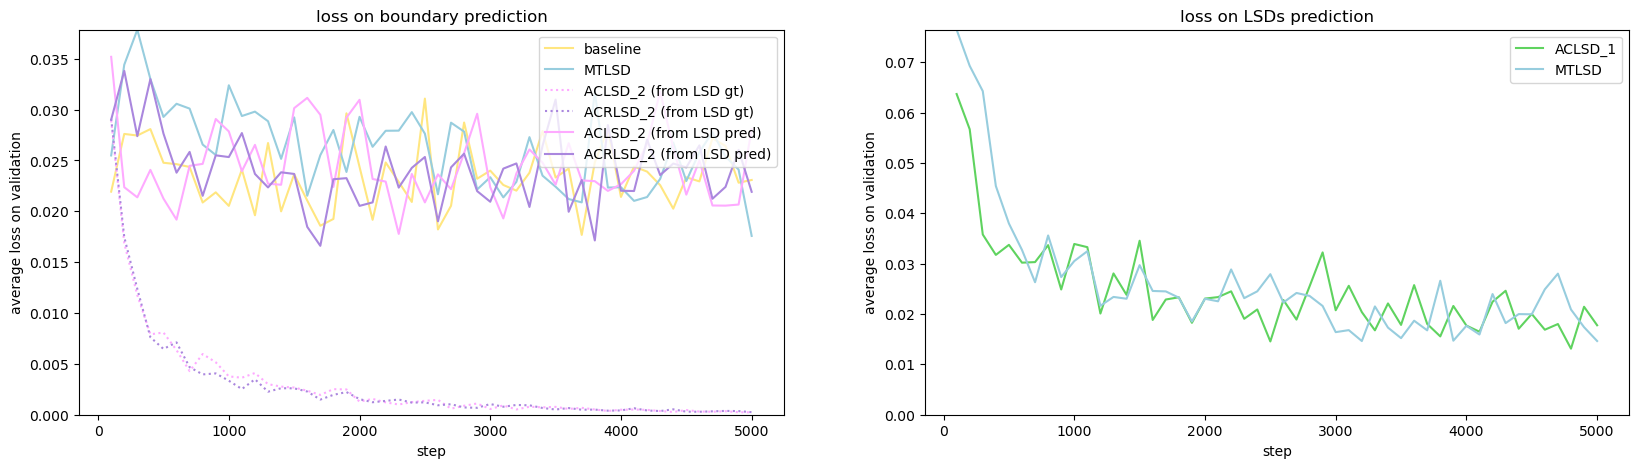

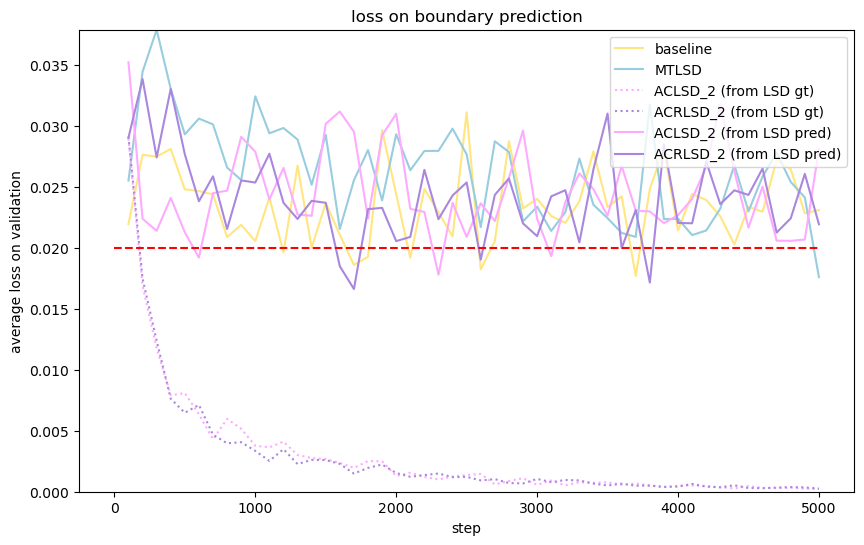

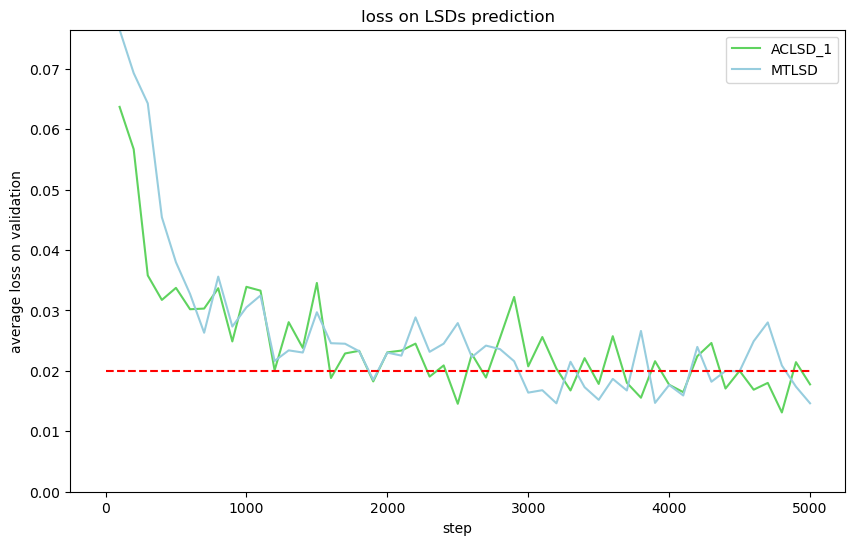

0

In [13]:
folder_name = '/home/enrico.negri/github/lsd_testing/output_5000_14_256_s10/'
plot_metric(folder_name)
plot_metric(folder_name, reference_line=0.02)

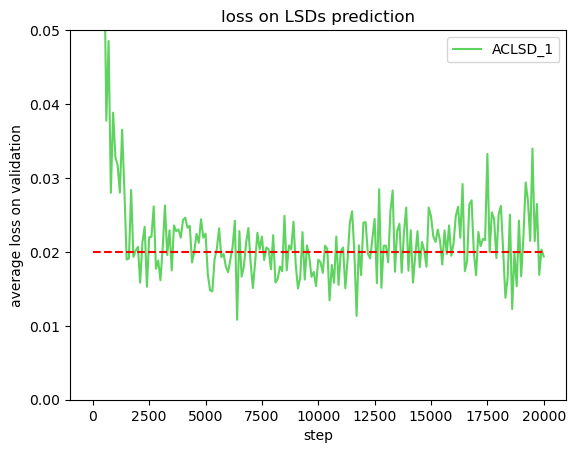

In [14]:
folder_name = '/home/enrico.negri/github/lsd_testing/output_20000_14_256_s10/'
raw_LSD = pd.read_csv(folder_name + 'raw-lsds.csv')

plt.plot(raw_LSD['step'], raw_LSD['0'], color='#5fd35f', label='ACLSD_1')
plt.hlines(0.02, xmin=0, xmax=max(raw_LSD['step']), color='red', linestyle='dashed')
plt.title('loss on LSDs prediction')
plt.xlabel('step')
plt.ylabel('average loss on validation')
plt.ylim([0, 0.05])
plt.legend(loc='upper right')

plt.show()
plt.close()

# testing different sigmas


In [35]:
from glob import glob
import os
import re
import seaborn as sns
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

def sigma_explorer(experiment_name, input_output, info=''):
    folders = sorted(glob(experiment_name + '*/'))

    records = []

    pattern = r'step(\d+)_b(\d+)_c(\d+)_lr([\d.]+)_s(\d+)'

    for i, path in enumerate(folders):
        folder_name = os.path.basename(os.path.normpath(path))
        # print(folder_name)
        match = re.match(pattern, folder_name)
        if match:
            steps, batch, crop, lr, sigma = match.groups()
            records.append({
                'steps' : int(steps),
                'batch': int(batch),
                'crop': int(crop),
                'lr': float(lr),
                'sigma': int(sigma),
                'data': pd.read_csv(experiment_name + folder_name + '/'+ input_output +'.csv')
            })
        

    n = len(records)
    palette = sns.color_palette("tab10", n)

    records = sorted(records, key=lambda x: x['sigma'])
    
    fig, (rough_plt, smooth_plt) = plt.subplots(1, 2, figsize=(15, 5))

    y_max = 0

    for i, sample in enumerate(records):
        rough_plt.plot(sample['data']['step'], sample['data']['0'], color = palette[i], label=records[i]['sigma'])
        if np.max(sample['data']['0']) > y_max:
            y_max = np.max(sample['data']['0'])

    rough_plt.set_ylim([0, y_max])
    rough_plt.legend(loc='upper right', title='sigma')


    for i, sample in enumerate(records):
        x = sample['data']['step']
        y = sample['data']['0']

        smoothed_y = lowess(y, x, frac=0.2)[:, 1]

        smooth_plt.plot(x, y, color = palette[i], alpha = 0.2)
        smooth_plt.plot(x, smoothed_y, color = palette[i], label=records[i]['sigma'])

    smooth_plt.set_ylim([0, y_max])
    smooth_plt.legend(loc='upper right', title='sigma')


    fig.suptitle(input_output + ' ' + info)
    plt.savefig(f'{experiment_name}{input_output}_loss.png')
    plt.show()
    

## raw ->LSDs

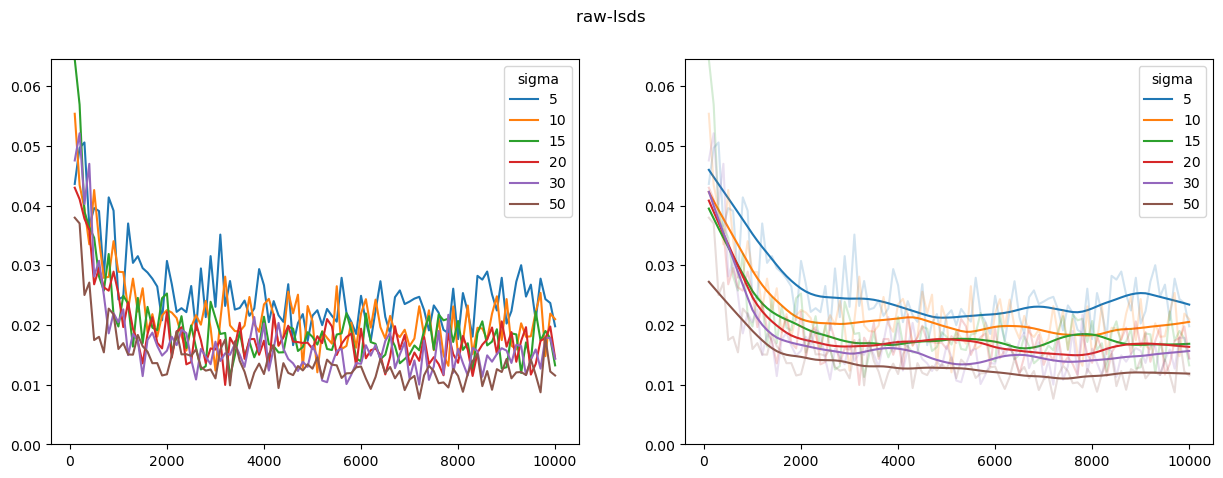

In [39]:
sigma_explorer('/home/enrico.negri/github/lsd_testing/output/different_sigmas/',
               'raw-lsds')

## LSD - boundaries

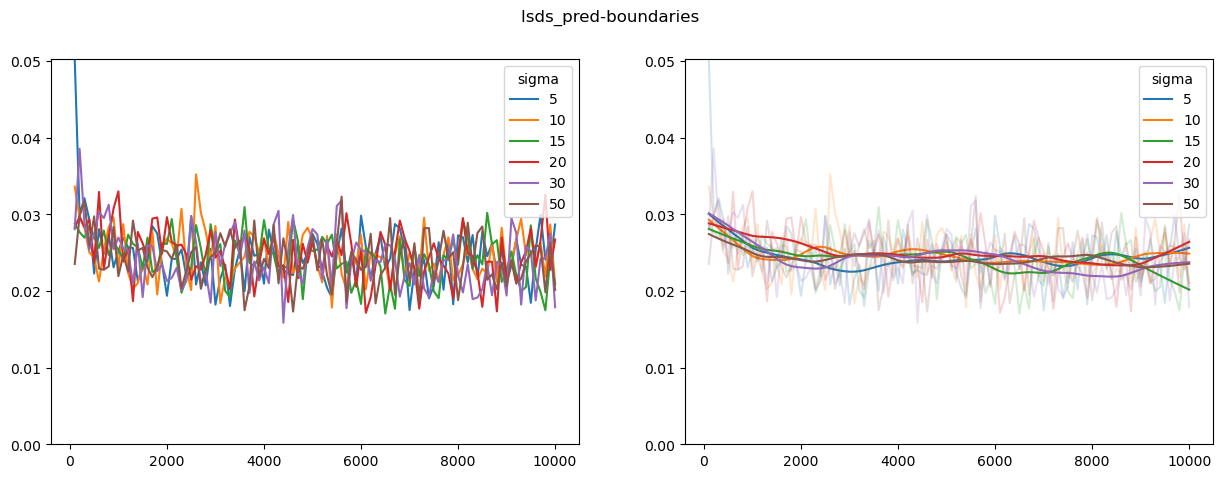

In [36]:
sigma_explorer('/home/enrico.negri/github/lsd_testing/output/lsd-bound_sigmas/boundaries/',
               'lsds_pred-boundaries')

## LSD - affinities (no erosion)

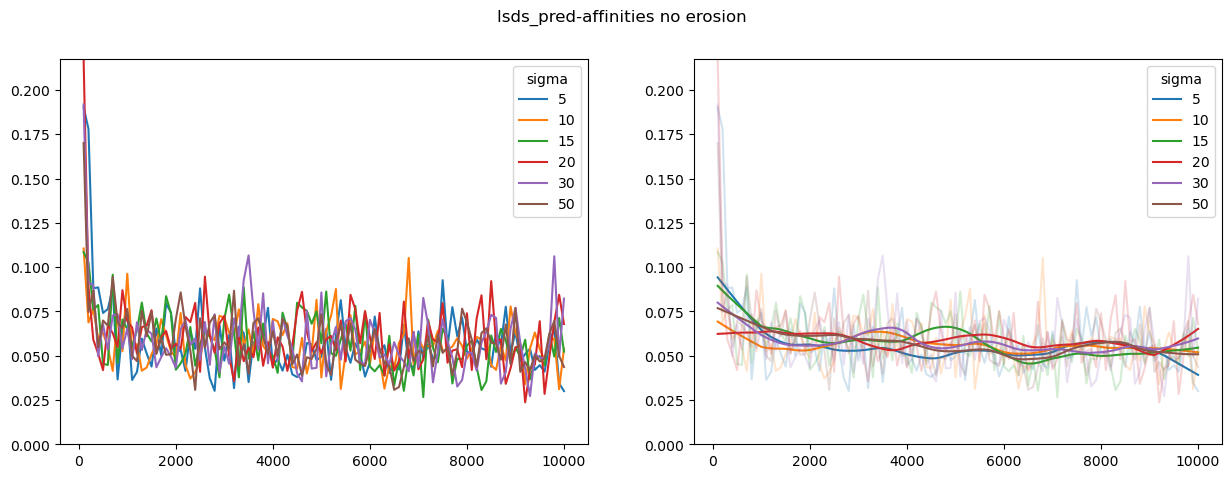

In [37]:
sigma_explorer('/home/enrico.negri/github/lsd_testing/output/lsd-bound_sigmas/affinities/noerosion/',
               'lsds_pred-affinities',
               info = 'no erosion')

## LSD - affinities (erosion)

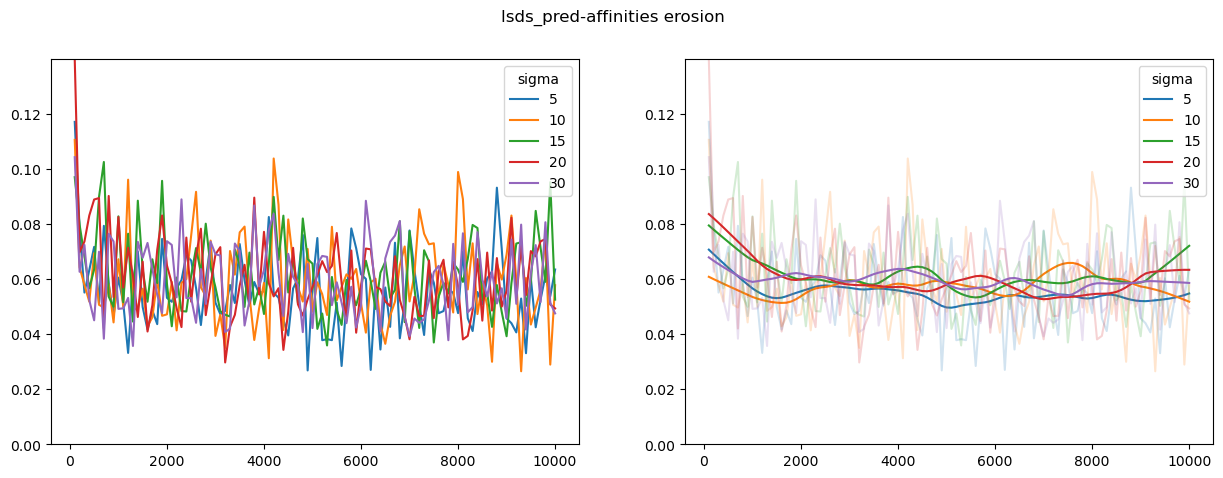

In [38]:
sigma_explorer('/home/enrico.negri/github/lsd_testing/output/lsd-bound_sigmas/affinities/erosion/',
               'lsds_pred-affinities',
               info = 'erosion')